In [22]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


datos = pd.read_csv('datos_test.csv', sep=',', encoding="ISO-8859-1", usecols=['Proveedor', 'Descripcion','cajas', 'monto'])
df = pd.DataFrame(datos)
print(df.info())
print()
#df[['Proveedor', 'Descripcion', 'cajas', 'monto']]

print('Monto promedio:', df['monto'].mean())
print('Cajas promedio:', df['cajas'].mean())
print()
print('Monto Total:', df['monto'].sum())
print('Cajas Totales:', df['cajas'].sum())
print()
print('Proveedores:\n', df['Proveedor'].unique())
print('Productos:\n', df['Descripcion'].unique())
#print(dir(df))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Proveedor    172 non-null    object 
 1   Descripcion  172 non-null    object 
 2   cajas        172 non-null    float64
 3   monto        172 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.5+ KB
None

Monto promedio: 3650951.075755813
Cajas promedio: 300.23837209302326

Monto Total: 627963585.0299999
Cajas Totales: 51641.0

Proveedores:
 ['BETTER HOME PRODUCTS, C.A.' 'BAYER, S.A.' 'POLIFILM DE VENEZUELA, S.A.'
 'BEIERSDORF S.A.' 'FABRICA NACIONAL DERIVADOS DE CARTON, C.A.'
 'ANCOR COSMETICS,C.A' 'CONSORCIO IMPORLIGTH, C.A.' 'GRUPO DIPACA, C.A.'
 'GAMMA FOOD INC,C.A.' 'EMULSIFICANTES VENEZOLANOS EMULVEN C A'
 'BLANQUEADORES VENEZOLANOS S.A' 'ALIMENTOS MERU C.A' 'MARENOSTRUM C.A'
 'INVERSIONES SHAFAGIAM 2013,CA.' 'LABORATORIOS FC PHARMA,CA']
Productos:
 ['LIMPIADOR DE POCETAS MA

In [23]:
pd.options.display.float_format = 'Bs.{:,.2f}'.format

grouped_df = df.groupby('Descripcion')['monto', 'cajas'].agg({'sum'}).reset_index()
grouped_df.columns = ['Descripcion', 'Monto', 'Cajas']


C:\Users\Jcc\AppData\Local\Temp/ipykernel_8076/914752070.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = df.groupby('Descripcion')['monto', 'cajas'].agg({'sum'}).reset_index()


In [9]:
grouped_df

,Descripcion,Monto,Cajas
0,ACEITE CARICIAS,"Bs.956,048.55",Bs.161.00
1,ARNICA FC FORTE ROLL ON,"Bs.69,088.44",Bs.2.00
2,ARNICA FC PLUS,"Bs.787,854.08",Bs.26.00
3,ARNICA FC ROLL ON,"Bs.587,251.74",Bs.17.00
4,BEDUCEN CREMA,"Bs.4,701,261.30",Bs.310.00
...,...,...,...
98,TAZZA FANTASIA DI CACAO,"Bs.623,946.15",Bs.15.00
99,TOALLITAS DESMAQUILLANTES.,"Bs.1,270,462.72",Bs.244.00
100,VASO PLASTICO PET VERDE # 12 12oz. 360cc,"Bs.1,004,837.47",Bs.86.00
101,VASOS FANTASIA DI CACAO,"Bs.901,365.60",Bs.13.00


#Los cinco productos mas vendidos

In [11]:
agrupado_monto = df.iloc[df.groupby('monto').agg(max_ = ('monto', lambda data: data.idxmax())).max_]

In [12]:
agrupado_monto

,Proveedor,Descripcion,cajas,monto
78,"ANCOR COSMETICS,C.A",GEL PARA EL CABELLO,Bs.-72.00,"Bs.-468,290.16"
97,"CONSORCIO IMPORLIGTH, C.A.",DULCILIGHT ESTUCHE,Bs.-4.00,"Bs.-181,256.56"
152,ALIMENTOS MERU C.A,SAL MERÃ GRUESA,Bs.-11.00,"Bs.-17,160.00"
55,BEIERSDORF S.A.,NIVEA SUN PROTECT & REFRESH FPS 50,Bs.-1.00,"Bs.-14,332.61"
1,"BETTER HOME PRODUCTS, C.A.",LIMPIADOR DE POCETAS MAS,Bs.-3.00,"Bs.-11,953.83"
...,...,...,...,...
98,"CONSORCIO IMPORLIGTH, C.A.",DULCILIGHT ESTUCHE,Bs.886.00,"Bs.43,479,045.53"
100,"GRUPO DIPACA, C.A.",COTUFAS DE MAIZ SABOR MANTEQUILLA,"Bs.3,146.00","Bs.44,641,852.46"
6,"BETTER HOME PRODUCTS, C.A.",LIMPIADOR DE POCETAS MAS,"Bs.5,366.00","Bs.45,137,531.98"
99,"GRUPO DIPACA, C.A.",COTUFAS DE MAIZ NATURAL,"Bs.3,222.00","Bs.45,594,700.59"


In [13]:
agrupado_cajas = df.iloc[df.groupby('cajas').agg(max_ = ('cajas', lambda data: data.idxmax())).max_].sort_index(ascending = True)

In [14]:
agrupado_cajas

,Proveedor,Descripcion,cajas,monto
0,"BETTER HOME PRODUCTS, C.A.",LIMPIADOR DE POCETAS MAS.,Bs.7.00,"Bs.16,853.27"
1,"BETTER HOME PRODUCTS, C.A.",LIMPIADOR DE POCETAS MAS,Bs.-3.00,"Bs.-11,953.83"
2,"BETTER HOME PRODUCTS, C.A.",LIMPIADOR DE POCETAS MAS,"Bs.2,590.00","Bs.8,549,780.45"
3,"BETTER HOME PRODUCTS, C.A.",LIMPIADOR DE POCETAS MAS,Bs.15.00,"Bs.56,442.45"
4,"BETTER HOME PRODUCTS, C.A.",LIMPIADOR DE POCETAS MAS,Bs.294.00,"Bs.1,543,823.40"
...,...,...,...,...
152,ALIMENTOS MERU C.A,SAL MERÃ GRUESA,Bs.-11.00,"Bs.-17,160.00"
154,ALIMENTOS MERU C.A,SAL MERÃ FINA,"Bs.1,068.00","Bs.5,764,496.70"
158,MARENOSTRUM C.A,PRESERVATIVO M-ZONE TEXTURIZADO,Bs.21.00,"Bs.508,965.57"
163,"INVERSIONES SHAFAGIAM 2013,CA.",VASOS FANTASIA DI CACAO,Bs.13.00,"Bs.901,365.60"


In [15]:
desc = df.loc[:, 'Descripcion'] == 'VASOS FANTASIA DI CACAO'
df_desc = df.loc[desc]
df_desc.head()

,Proveedor,Descripcion,cajas,monto
163,"INVERSIONES SHAFAGIAM 2013,CA.",VASOS FANTASIA DI CACAO,Bs.13.00,"Bs.901,365.60"


In [16]:
df.iloc[161]


Proveedor      INVERSIONES SHAFAGIAM 2013,CA.
Descripcion           TAZZA FANTASIA DI CACAO
cajas                                Bs.15.00
monto                           Bs.623,946.15
Name: 161, dtype: object

In [17]:
df.max()

Proveedor      POLIFILM DE VENEZUELA, S.A.
Descripcion    VASOS FANTASIA DI CACAO DUO
cajas                          Bs.7,650.00
monto                    Bs.192,022,369.28
dtype: object

In [18]:

monthly_sales = df.groupby(['Descripcion']).agg(['sum'])
datos.sum()

#dir_test = '/content/drive/My Drive/datos_test.csv'

#datos.to_csv(dir_test)


Proveedor      BETTER HOME PRODUCTS, C.A.BETTER HOME PRODUCTS...
Descripcion    LIMPIADOR DE POCETAS MAS.LIMPIADOR DE POCETAS ...
cajas                                               Bs.51,641.00
monto                                          Bs.627,963,585.03
dtype: object

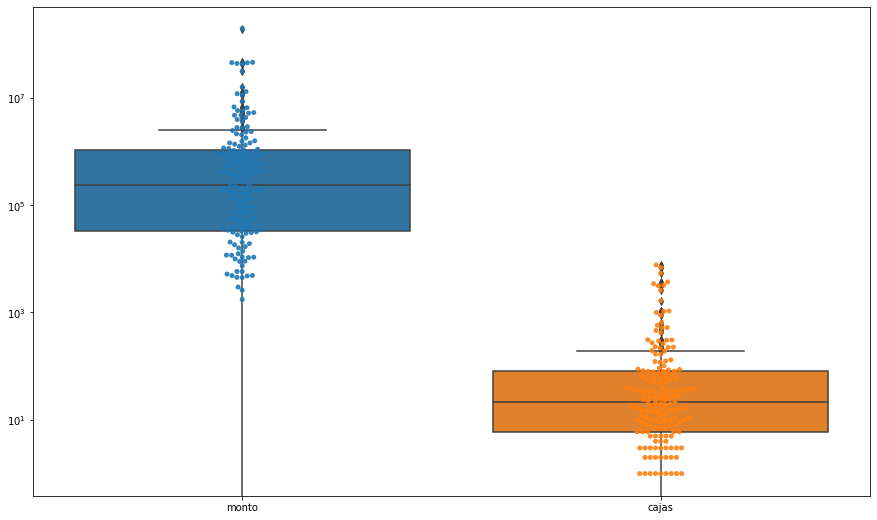

In [24]:
f, ax = plt.subplots(figsize=(15,9))
ax.set_yscale('log')
sns.swarmplot(data=datos[['monto', 'cajas']],size=5, alpha=0.9)
sns.boxplot(data=datos[['monto', 'cajas']])
print()